In [ ]:
import numpy as np
import pandas as pd
import torch
from transformers import BertTokenizer,BertForSequenceClassification,AdamW,get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset,DataLoader,random_split


In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import re

In [ ]:
df=pd.read_csv("/content/training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1",header=None)

FileNotFoundError: [Errno 2] No such file or directory: '/content/training.1600000.processed.noemoticon.csv'

In [ ]:
short_df=df.sample(500)


In [ ]:
short_df.shape

(500, 6)

In [ ]:
short_df.to_csv('short_twitter.csv')

#stating with shorten data

In [ ]:
short_df=pd.read_csv('/content/short_twitter.csv',header=None)

In [ ]:
df=short_df

In [ ]:
df.drop(columns=[0],inplace=True)

In [ ]:
df.shape

(501, 6)

In [ ]:
df=df.iloc[1:,:]

In [ ]:
df.head()

,1,2,3,4,5,6
1,0,2202266000,Tue Jun 16 21:30:28 PDT 2009,NO_QUERY,JarviMac,and the clouds opened and God said &quot;Jarvi...
2,4,2039857149,Thu Jun 04 22:59:19 PDT 2009,NO_QUERY,missgiggly,@Afficionados_HH Computer wallpaper my dear..
3,0,2210742350,Wed Jun 17 11:57:57 PDT 2009,NO_QUERY,lrnn,"@starsapart it's part of the criminal career, ..."
4,0,1991676003,Mon Jun 01 07:28:03 PDT 2009,NO_QUERY,bpirzada,@mileycyrus is this end of hannah montana for ...
5,4,1964481267,Fri May 29 14:18:14 PDT 2009,NO_QUERY,esseb,hermitstargazerIcon_lock@Zeke0 that's some nas...


In [ ]:
new_df=df[[1,6]]

In [ ]:
new_df.head()

,1,6
1,0,and the clouds opened and God said &quot;Jarvi...
2,4,@Afficionados_HH Computer wallpaper my dear..
3,0,"@starsapart it's part of the criminal career, ..."
4,0,@mileycyrus is this end of hannah montana for ...
5,4,hermitstargazerIcon_lock@Zeke0 that's some nas...


In [ ]:
new_df.columns=["sentiment","text"]

In [ ]:
new_df

,sentiment,text
1,0,and the clouds opened and God said &quot;Jarvi...
2,4,@Afficionados_HH Computer wallpaper my dear..
3,0,"@starsapart it's part of the criminal career, ..."
4,0,@mileycyrus is this end of hannah montana for ...
5,4,hermitstargazerIcon_lock@Zeke0 that's some nas...
...,...,...
496,4,"Lying on beanbag, looking up at the clear blue..."
497,0,Finals tom.
498,0,@AgynessDB can't get superdry in cleveland
499,4,Hahahaha.Thanks JB for reminding me of the gam...


#EDA steps

<Axes: xlabel='sentiment'>

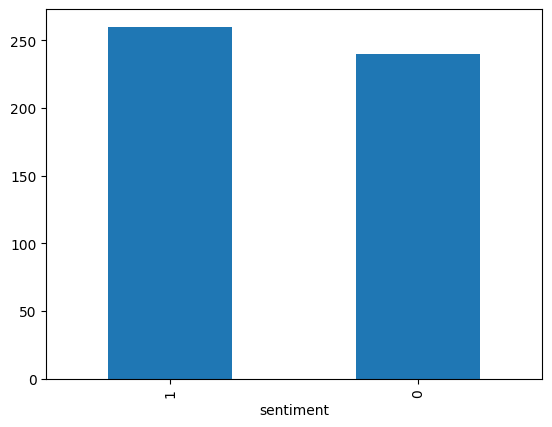

In [ ]:
new_df['sentiment'].value_counts().plot(kind="bar")

In [ ]:
new_df['sentiment']=new_df['sentiment'].apply(lambda x : 1 if x==4 else x)

<ipython-input-30-240caeee7e89>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['sentiment']=new_df['sentiment'].apply(lambda x : 1 if x==4 else x)


In [ ]:
all_labels=list(new_df["sentiment"].unique())

In [ ]:
all_labels

[0, 1]

#preprocessing on data

In [ ]:
stemmer=PorterStemmer()

In [ ]:
#stopwords.words('english')

In [ ]:
def stemming(text):
  text=re.sub("[^a-zA-Z]",' ',text)
  text=text.lower()
  text=text.split(" ")
  #print(text)
  modified_text=[]
  for i in text:
    if i not in stopwords.words('english'):
      modified_text.append(stemmer.stem(i))
  modified_text=" ".join(modified_text)
  return modified_text


In [ ]:
stemming("I am a good boy Do you know this")

['i', 'am', 'a', 'good', 'boy', 'do', 'you', 'know', 'this']


'good boy know'

In [ ]:
new_df.head()

,sentiment,text
1,0,and the clouds opened and God said &quot;Jarvi...
2,1,@Afficionados_HH Computer wallpaper my dear..
3,0,"@starsapart it's part of the criminal career, ..."
4,0,@mileycyrus is this end of hannah montana for ...
5,1,hermitstargazerIcon_lock@Zeke0 that's some nas...


In [ ]:
new_df['trans_text']=new_df['text'].apply(stemming)

<ipython-input-38-008fa389c0e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['trans_text']=new_df['text'].apply(stemming)


In [ ]:
new_df.head()

,sentiment,text,trans_text
1,0,and the clouds opened and God said &quot;Jarvi...,cloud open god said quot jarvi one ever date ...
2,1,@Afficionados_HH Computer wallpaper my dear..,afficionado hh comput wallpap dear
3,0,"@starsapart it's part of the criminal career, ...",starsapart part crimin career prob lol neve...
4,0,@mileycyrus is this end of hannah montana for ...,mileycyru end hannah montana good
5,1,hermitstargazerIcon_lock@Zeke0 that's some nas...,hermitstargazericon lock zeke nasti prematur ...


In [ ]:
new_df.iloc[2]['trans_text']

' starsapart part crimin career  prob lol  never went jail sim    haha '

In [ ]:
texts=new_df['trans_text'].values
labels=new_df['sentiment'].values

In [ ]:
labels

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,

#Model assignment

In [ ]:
tokenizer=BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
tokenizer.encode_plus(new_df['trans_text'].iloc[0],add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 100,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt')

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


{'input_ids': tensor([[  101,  6112,  2330,  2643,  2056, 22035,  2102, 15723,  5737,  2028,
          2412,  3058,  8572, 13012,  2141,  2767, 22035,  2102,  4718,  2140,
           102,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0

In [ ]:
def tokenization_map(sentences,lab=None):
  global labels
  input_ids=[]
  attention_mask=[]
  for sentence in sentences:
    ids_dict=tokenizer.encode_plus(sentence,add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 100,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',
                                   truncation=True)
    input_ids.append(ids_dict['input_ids'])
    attention_mask.append(ids_dict['attention_mask'])
  ids=torch.cat(input_ids,dim=0)
  att_mask=torch.cat(attention_mask,dim=0)
  labels=torch.tensor(labels)
  if lab!=None:
    return ids,att_mask,lab
  else:
    return ids,att_mask



In [ ]:
input_ids,attention_masks,lebels=tokenization_map(texts,labels)

<ipython-input-46-a74ebc7bfd92>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels=torch.tensor(lab)


In [ ]:
input_ids.shape

torch.Size([500, 100])

In [ ]:
attention_masks.shape

tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])

In [ ]:
labels.shape

torch.Size([500])

#converting to tensor DataSet

In [ ]:
dataset=TensorDataset(input_ids,attention_masks,labels)

In [ ]:
len(dataset)

500

In [ ]:
##spliting the dataset
train_size=int(0.8*len(dataset))
val_size=len(dataset)-train_size

In [ ]:
train_dataset, val_dataset= random_split(dataset,[train_size,val_size])

In [ ]:
len(train_dataset)

400

#converting to dataLoaders

In [ ]:
batch_size=32
num_workers=4

In [ ]:
train_dataloader=DataLoader(train_dataset,batch_size=batch_size,shuffle=True,num_workers=num_workers)

val_dataloader=DataLoader(val_dataset,batch_size=1,shuffle=True)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


#enabling GPU

In [ ]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#model assignement for training

In [ ]:
#help(BertForSequenceClassification.from_pretrained)

In [ ]:
model=BertForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=len(labels),
                                                    )

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
optimizer=torch.optim.AdamW(model.parameters(),lr=6e-6,eps=1e-8)

#Start Training

In [ ]:
num_epoch=10
total_steps=num_epoch*batch_size
scheduler=get_linear_schedule_with_warmup(optimizer,num_warmup_steps=0,num_training_steps=total_steps)

In [ ]:
model.train()


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
print(len(train_dataloader))

13


In [ ]:
total_step=len(train_dataloader)

In [ ]:
total_steps

320

In [ ]:
for i in range(num_epoch):
  total_loss=0
  for id,(ipds,att,label) in enumerate(train_dataloader):
    ipds=ipds.to(device)
    att=att.to(device)
    label=label.to(device)
    loss=model(ipds,attention_mask=att,labels=label,token_type_ids=None)[0]## token_type_ids useful for qa tasks
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    total_loss+=loss.item()
  print('Epoch: {}, loss: {:.4f}'.format(i+1,total_loss/total_step))

Epoch: 1, loss: 6.3423
Epoch: 2, loss: 6.3408
Epoch: 3, loss: 6.3422
Epoch: 4, loss: 6.3445
Epoch: 5, loss: 6.3433
Epoch: 6, loss: 6.3411
Epoch: 7, loss: 6.3437
Epoch: 8, loss: 6.3417
Epoch: 9, loss: 6.3447
Epoch: 10, loss: 6.3405


#validation

In [ ]:
test_str=new_df.iloc[2]['trans_text']
test_str

' starsapart part crimin career  prob lol  never went jail sim    haha '

In [ ]:
test_dict=tokenizer.encode_plus(test_str,add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 100,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',
                                   truncation=True)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
test_dict

{'input_ids': tensor([[  101,  3340, 22068,  5339,  2112, 13675, 27605,  2078,  2476,  4013,
          2497,  8840,  2140,  2196,  2253,  7173, 21934,  5292,  3270,   102,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0

In [ ]:
model.eval()

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
input_id, attention_mask = tokenization_map([test_str])

g_label = model(input_id.to(device), token_type_ids=None, attention_mask=attention_mask.to(device))[0]
pred = torch.max(g_label, 1)[1][0].item()

print('\n')
print(pred)
print('Predict: {}'.format(all_labels[pred]))
print('GT: {}'.format(all_labels[label]))
print('---------------------------------------------------------------------------------------------\n')



400


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2834: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
<ipython-input-101-3974abad0fb1>:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels=torch.tensor(labels)


IndexError: list index out of range